In [ ]:
# This libary allows us to download stock data from Yahoo Finance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Initialize the ticker class
sp500 = yf.Ticker("^GSPC")
# Get the historical prices for this ticker
sp500_data=sp500.history(period="max")
sp500_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-08-29 00:00:00-04:00,6489.279785,6491.759766,6444.569824,6460.259766,4234840000,0.0,0.0
2025-09-02 00:00:00-04:00,6401.509766,6416.540039,6360.580078,6415.540039,4784000000,0.0,0.0
2025-09-03 00:00:00-04:00,6445.819824,6453.669922,6416.169922,6448.259766,4465360000,0.0,0.0


In [5]:
sp500_data.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-08-22 00:00:00-04:00', '2025-08-25 00:00:00-04:00',
               '2025-08-26 00:00:00-04:00', '2025-08-27 00:00:00-04:00',
               '2025-08-28 00:00:00-04:00', '2025-08-29 00:00:00-04:00',
               '2025-09-02 00:00:00-04:00', '2025-09-03 00:00:00-04:00',
               '2025-09-04 00:00:00-04:00', '2025-09-05 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24536, freq=None)

<Axes: xlabel='Date'>

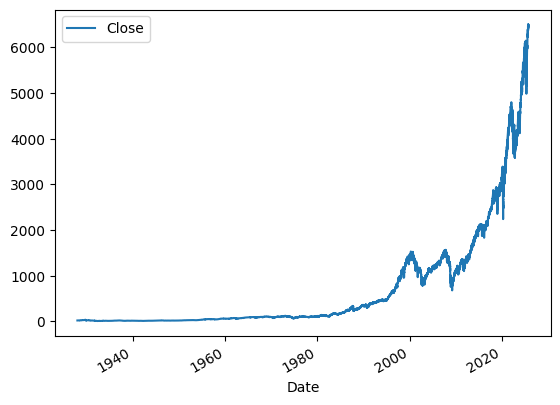

In [9]:
sp500_data.plot.line(y="Close", use_index=True)

In [10]:
del sp500_data['Dividends']
del sp500_data['Stock Splits']

In [ ]:
# Set the price for tomorrow using the shift method
sp500_data["Tomorrow"] = sp500_data["Close"].shift(-1)
sp500_data

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-08-29 00:00:00-04:00,6489.279785,6491.759766,6444.569824,6460.259766,4234840000,6415.540039
2025-09-02 00:00:00-04:00,6401.509766,6416.540039,6360.580078,6415.540039,4784000000,6448.259766
2025-09-03 00:00:00-04:00,6445.819824,6453.669922,6416.169922,6448.259766,4465360000,6502.080078


In [13]:
sp500_data["Target"] = (sp500_data["Tomorrow"] > sp500_data["Close"]).astype(int)
sp500_data

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-08-29 00:00:00-04:00,6489.279785,6491.759766,6444.569824,6460.259766,4234840000,6415.540039,0
2025-09-02 00:00:00-04:00,6401.509766,6416.540039,6360.580078,6415.540039,4784000000,6448.259766,1
2025-09-03 00:00:00-04:00,6445.819824,6453.669922,6416.169922,6448.259766,4465360000,6502.080078,1


In [ ]:
# Keep only data from 1990 onwards as that is reliable data
sp500_data = sp500_data.loc["1990-01-01":].copy()
sp500_data

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-08-29 00:00:00-04:00,6489.279785,6491.759766,6444.569824,6460.259766,4234840000,6415.540039,0
2025-09-02 00:00:00-04:00,6401.509766,6416.540039,6360.580078,6415.540039,4784000000,6448.259766,1
2025-09-03 00:00:00-04:00,6445.819824,6453.669922,6416.169922,6448.259766,4465360000,6502.080078,1
